# Distribuicões de variáveis dentro das classes

In [9]:
# Importar as Bibliotecas

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import datasets


In [3]:
df_iris = datasets.load_iris()
name_columns = df_iris.feature_names
des_target = df_iris.target_names

df = pd.DataFrame(data=df_iris.data, columns=name_columns)
df['target'] = df_iris.target

In [6]:
des_target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Feature analizada: sepal length (cm)


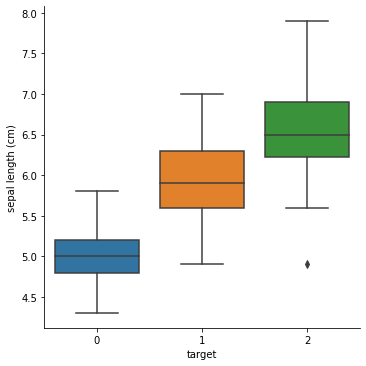

Feature analizada: sepal width (cm)


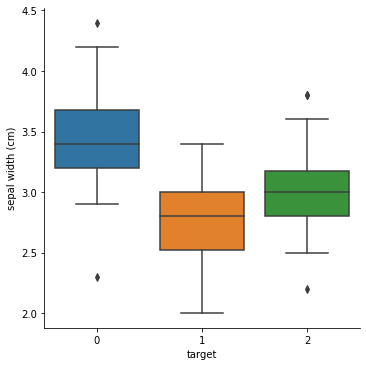

Feature analizada: petal length (cm)


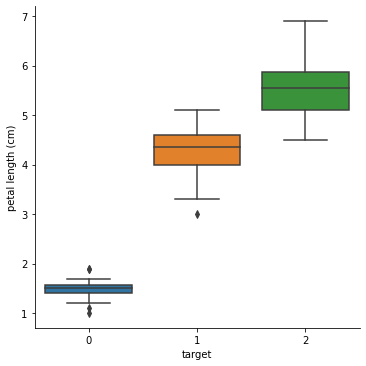

Feature analizada: petal width (cm)


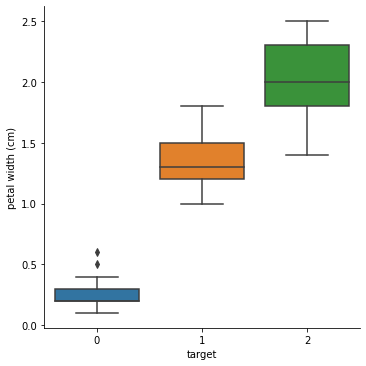

In [10]:
for feature in name_columns:
    print(f"Feature analizada: {feature}")
    sn.catplot(x="target", y=feature, kind="box", data=df)
    plt.show()

## Escor Z

Às vezes, os dados são padronizados primeiro (por exemplo, para um escore Z com média zero e variância da unidade) de modo que a detecção de outlier possa ser realizada usando valores de corte de escore Z padrão. Isso é uma conveniência e não é obrigatório em geral, e faremos os cálculos na escala original dos dados aqui para tornar as coisas mais claras. Podemos calcular a média e o desvio padrão de uma determinada amostra e, em seguida, calcular o cut-off para identificar outliers como mais de 2 desvios padrão da média.

In [15]:
for variavel in name_columns:
    df_defaut = []
    for value, target in enumerate(des_target):
        dados = df[df["target"]==value]
        print(f"Classe: {des_target[value]} - variavel: {variavel}")

        data_mean, data_std = dados[variavel].mean(), dados[variavel].std()
        data_min, data_max = dados[variavel].min(), dados[variavel].max()
        print("Real Min: %.3f Real Max: %.3f" %  (data_min, data_max))

        cut_off = data_std * 2.5
        lower, upper = data_mean - cut_off, data_mean + cut_off
        print("Limit Min: %.3f Limit Max: %.3f" %  (lower, upper))


        dataset = dados[dados[variavel] >= lower]
        if len(dataset) == 0:
            dataset = dados[dados[variavel] <= upper]
        else:
            dataset = dataset[dataset[variavel] <= upper]


        df_defaut.append(dataset)

        outliers = pd.concat([dados[dados[variavel] < lower], dados[dados[variavel] > upper]])
        print("Identfied outliers: %d \n" % len(outliers))

    df = pd.concat(df_defaut)


Classe: setosa - variavel: sepal length (cm)
Real Min: 4.300 Real Max: 5.800
Limit Min: 4.125 Limit Max: 5.887
Identfied outliers: 0 

Classe: versicolor - variavel: sepal length (cm)
Real Min: 4.900 Real Max: 7.000
Limit Min: 4.646 Limit Max: 7.226
Identfied outliers: 0 

Classe: virginica - variavel: sepal length (cm)
Real Min: 4.900 Real Max: 7.900
Limit Min: 4.998 Limit Max: 8.178
Identfied outliers: 1 

Classe: setosa - variavel: sepal width (cm)
Real Min: 2.300 Real Max: 4.400
Limit Min: 2.480 Limit Max: 4.376
Identfied outliers: 2 

Classe: versicolor - variavel: sepal width (cm)
Real Min: 2.000 Real Max: 3.400
Limit Min: 1.986 Limit Max: 3.554
Identfied outliers: 0 

Classe: virginica - variavel: sepal width (cm)
Real Min: 2.200 Real Max: 3.800
Limit Min: 2.188 Limit Max: 3.780
Identfied outliers: 2 

Classe: setosa - variavel: petal length (cm)
Real Min: 1.000 Real Max: 1.900
Limit Min: 1.026 Limit Max: 1.904
Identfied outliers: 1 

Classe: versicolor - variavel: petal length 

In [16]:
print(f"shape : {df.shape}")

shape : (141, 5)
